In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터파일 읽어오기
raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [5]:
# 항목별 describe
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


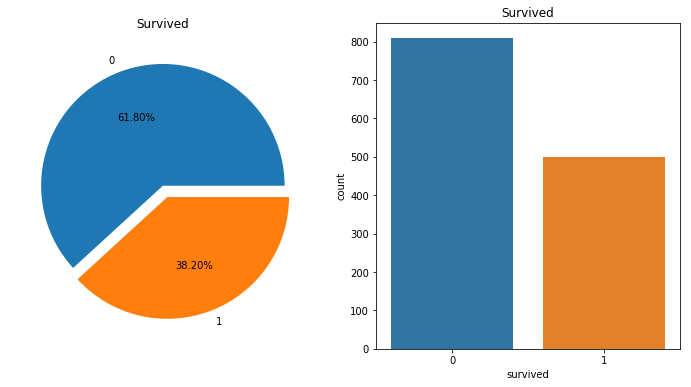

In [6]:
# graph로 시각화하기
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

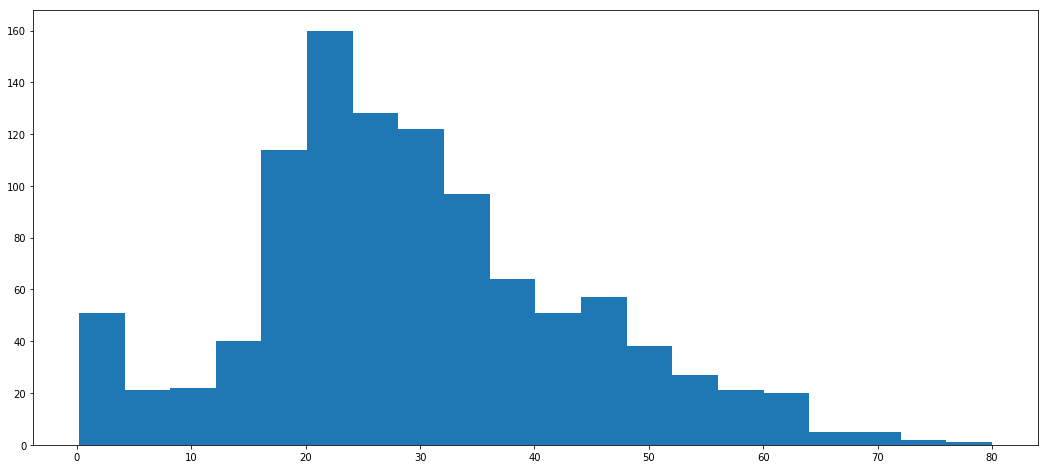

In [7]:
# 사람들의 나이 분석
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [8]:
# class별로 생존자분석
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [9]:
# delete nan
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [10]:
# test로 10%의 데이터 남겨두기
x_data = raw_data.values[:, [0,3,4,5]]
y_data = raw_data.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [11]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

# tensorflow
print('tensorflow version : ', tf.__version__)
# keras
print('keras version : ', keras.__version__)

tensorflow version :  1.13.1
keras version :  2.2.4


Using TensorFlow backend.


In [12]:
# model 설정
model = Sequential()
model.add(Dense(255, input_shape=(4,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 256       
Total params: 1,531
Trainable params: 1,531
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 353us/step - loss: 0.2522 - acc: 0.5819 - val_loss: 0.2190 - val_acc: 0.6571
Epoch 2/500
940/940 [==============================] - 0s 44us/step - loss: 0.2118 - acc: 0.6936 - val_loss: 0.2155 - val_acc: 0.5905
Epoch 3/500
940/940 [==============================] - 0s 40us/step - loss: 0.2013 - acc: 0.6915 - val_loss: 0.1994 - val_acc: 0.7048
Epoch 4/500
940/940 [==============================] - 0s 46us/step - loss: 0.1837 - acc: 0.7543 - val_loss: 0.1951 - val_acc: 0.7048
Epoch 5/500
940/940 [==============================] - 0s 41us/step - loss: 0.1776 - acc: 0.7426 - val_loss: 0.1712 - val_acc: 0.7524
Epoch 6/500
940/940 [==============================] - 0s 45us/step - loss: 0.1605 - acc: 0.7926 - val_loss: 0.1575 - val_acc: 0.7810
Epoch 7/500
940/940 [==============================] - 0s 35us/step - loss: 0.1601 - acc: 0.7872 - va

940/940 [==============================] - 0s 39us/step - loss: 0.1366 - acc: 0.8138 - val_loss: 0.1449 - val_acc: 0.7714
Epoch 60/500
940/940 [==============================] - 0s 46us/step - loss: 0.1367 - acc: 0.8096 - val_loss: 0.1450 - val_acc: 0.8095
Epoch 61/500
940/940 [==============================] - 0s 42us/step - loss: 0.1382 - acc: 0.8191 - val_loss: 0.1442 - val_acc: 0.7810
Epoch 62/500
940/940 [==============================] - 0s 38us/step - loss: 0.1399 - acc: 0.8117 - val_loss: 0.1471 - val_acc: 0.7905
Epoch 63/500
940/940 [==============================] - 0s 40us/step - loss: 0.1399 - acc: 0.7968 - val_loss: 0.1442 - val_acc: 0.8095
Epoch 64/500
940/940 [==============================] - 0s 38us/step - loss: 0.1386 - acc: 0.8096 - val_loss: 0.1442 - val_acc: 0.7905
Epoch 65/500
940/940 [==============================] - 0s 36us/step - loss: 0.1384 - acc: 0.8170 - val_loss: 0.1438 - val_acc: 0.7810
Epoch 66/500
940/940 [==============================] - 0s 31us/step

940/940 [==============================] - 0s 32us/step - loss: 0.1412 - acc: 0.8064 - val_loss: 0.1443 - val_acc: 0.7810
Epoch 120/500
940/940 [==============================] - 0s 37us/step - loss: 0.1341 - acc: 0.8213 - val_loss: 0.1462 - val_acc: 0.8190
Epoch 121/500
940/940 [==============================] - 0s 45us/step - loss: 0.1341 - acc: 0.8223 - val_loss: 0.1429 - val_acc: 0.8095
Epoch 122/500
940/940 [==============================] - 0s 42us/step - loss: 0.1326 - acc: 0.8181 - val_loss: 0.1438 - val_acc: 0.8095
Epoch 123/500
940/940 [==============================] - 0s 35us/step - loss: 0.1394 - acc: 0.8053 - val_loss: 0.1459 - val_acc: 0.7810
Epoch 124/500
940/940 [==============================] - 0s 31us/step - loss: 0.1410 - acc: 0.8106 - val_loss: 0.1458 - val_acc: 0.7810
Epoch 125/500
940/940 [==============================] - 0s 32us/step - loss: 0.1359 - acc: 0.8170 - val_loss: 0.1512 - val_acc: 0.8000
Epoch 126/500
940/940 [==============================] - 0s 37

940/940 [==============================] - 0s 36us/step - loss: 0.1315 - acc: 0.8160 - val_loss: 0.1440 - val_acc: 0.8190
Epoch 180/500
940/940 [==============================] - 0s 33us/step - loss: 0.1318 - acc: 0.8191 - val_loss: 0.1447 - val_acc: 0.8000
Epoch 181/500
940/940 [==============================] - 0s 35us/step - loss: 0.1315 - acc: 0.8160 - val_loss: 0.1448 - val_acc: 0.8190
Epoch 182/500
940/940 [==============================] - 0s 34us/step - loss: 0.1328 - acc: 0.8181 - val_loss: 0.1443 - val_acc: 0.8000
Epoch 183/500
940/940 [==============================] - ETA: 0s - loss: 0.1499 - acc: 0.781 - 0s 34us/step - loss: 0.1313 - acc: 0.8223 - val_loss: 0.1451 - val_acc: 0.8095
Epoch 184/500
940/940 [==============================] - 0s 34us/step - loss: 0.1321 - acc: 0.8117 - val_loss: 0.1476 - val_acc: 0.7714
Epoch 185/500
940/940 [==============================] - 0s 33us/step - loss: 0.1324 - acc: 0.8223 - val_loss: 0.1443 - val_acc: 0.8000
Epoch 186/500
940/940 [=

940/940 [==============================] - 0s 36us/step - loss: 0.1313 - acc: 0.8202 - val_loss: 0.1489 - val_acc: 0.7810
Epoch 240/500
940/940 [==============================] - 0s 35us/step - loss: 0.1298 - acc: 0.8213 - val_loss: 0.1522 - val_acc: 0.7619
Epoch 241/500
940/940 [==============================] - 0s 35us/step - loss: 0.1340 - acc: 0.8170 - val_loss: 0.1455 - val_acc: 0.8190
Epoch 242/500
940/940 [==============================] - 0s 33us/step - loss: 0.1322 - acc: 0.8181 - val_loss: 0.1449 - val_acc: 0.8190
Epoch 243/500
940/940 [==============================] - 0s 41us/step - loss: 0.1319 - acc: 0.8138 - val_loss: 0.1448 - val_acc: 0.8095
Epoch 244/500
940/940 [==============================] - 0s 36us/step - loss: 0.1300 - acc: 0.8266 - val_loss: 0.1482 - val_acc: 0.7810
Epoch 245/500
940/940 [==============================] - 0s 32us/step - loss: 0.1318 - acc: 0.8117 - val_loss: 0.1499 - val_acc: 0.8190
Epoch 246/500
940/940 [==============================] - 0s 47

Epoch 299/500
940/940 [==============================] - 0s 36us/step - loss: 0.1282 - acc: 0.8245 - val_loss: 0.1521 - val_acc: 0.7524
Epoch 300/500
940/940 [==============================] - 0s 34us/step - loss: 0.1303 - acc: 0.8170 - val_loss: 0.1490 - val_acc: 0.7619
Epoch 301/500
940/940 [==============================] - 0s 32us/step - loss: 0.1320 - acc: 0.8106 - val_loss: 0.1451 - val_acc: 0.8190
Epoch 302/500
940/940 [==============================] - 0s 35us/step - loss: 0.1308 - acc: 0.8255 - val_loss: 0.1446 - val_acc: 0.8095
Epoch 303/500
940/940 [==============================] - 0s 37us/step - loss: 0.1300 - acc: 0.8202 - val_loss: 0.1471 - val_acc: 0.8190
Epoch 304/500
940/940 [==============================] - 0s 39us/step - loss: 0.1310 - acc: 0.8213 - val_loss: 0.1487 - val_acc: 0.7619
Epoch 305/500
940/940 [==============================] - 0s 38us/step - loss: 0.1293 - acc: 0.8213 - val_loss: 0.1453 - val_acc: 0.8190
Epoch 306/500
940/940 [=========================

940/940 [==============================] - 0s 35us/step - loss: 0.1298 - acc: 0.8202 - val_loss: 0.1452 - val_acc: 0.8095
Epoch 360/500
940/940 [==============================] - 0s 35us/step - loss: 0.1301 - acc: 0.8223 - val_loss: 0.1448 - val_acc: 0.8095
Epoch 361/500
940/940 [==============================] - 0s 43us/step - loss: 0.1325 - acc: 0.8128 - val_loss: 0.1469 - val_acc: 0.8095
Epoch 362/500
940/940 [==============================] - 0s 38us/step - loss: 0.1320 - acc: 0.8138 - val_loss: 0.1450 - val_acc: 0.8095
Epoch 363/500
940/940 [==============================] - 0s 34us/step - loss: 0.1320 - acc: 0.8181 - val_loss: 0.1452 - val_acc: 0.8190
Epoch 364/500
940/940 [==============================] - 0s 36us/step - loss: 0.1289 - acc: 0.8202 - val_loss: 0.1452 - val_acc: 0.8095
Epoch 365/500
940/940 [==============================] - 0s 38us/step - loss: 0.1287 - acc: 0.8234 - val_loss: 0.1448 - val_acc: 0.8095
Epoch 366/500
940/940 [==============================] - 0s 38

940/940 [==============================] - 0s 36us/step - loss: 0.1292 - acc: 0.8213 - val_loss: 0.1457 - val_acc: 0.8095
Epoch 420/500
940/940 [==============================] - 0s 40us/step - loss: 0.1276 - acc: 0.8181 - val_loss: 0.1461 - val_acc: 0.8190
Epoch 421/500
940/940 [==============================] - 0s 42us/step - loss: 0.1304 - acc: 0.8202 - val_loss: 0.1448 - val_acc: 0.8095
Epoch 422/500
940/940 [==============================] - 0s 37us/step - loss: 0.1285 - acc: 0.8191 - val_loss: 0.1462 - val_acc: 0.8095
Epoch 423/500
940/940 [==============================] - 0s 39us/step - loss: 0.1277 - acc: 0.8234 - val_loss: 0.1470 - val_acc: 0.8190
Epoch 424/500
940/940 [==============================] - 0s 36us/step - loss: 0.1292 - acc: 0.8213 - val_loss: 0.1451 - val_acc: 0.8095
Epoch 425/500
940/940 [==============================] - 0s 40us/step - loss: 0.1275 - acc: 0.8223 - val_loss: 0.1450 - val_acc: 0.8095
Epoch 426/500
940/940 [==============================] - 0s 42

940/940 [==============================] - 0s 38us/step - loss: 0.1276 - acc: 0.8213 - val_loss: 0.1459 - val_acc: 0.8095
Epoch 480/500
940/940 [==============================] - 0s 36us/step - loss: 0.1282 - acc: 0.8223 - val_loss: 0.1459 - val_acc: 0.7905
Epoch 481/500
940/940 [==============================] - 0s 37us/step - loss: 0.1300 - acc: 0.8117 - val_loss: 0.1461 - val_acc: 0.8000
Epoch 482/500
940/940 [==============================] - 0s 31us/step - loss: 0.1266 - acc: 0.8223 - val_loss: 0.1461 - val_acc: 0.8095
Epoch 483/500
940/940 [==============================] - 0s 39us/step - loss: 0.1267 - acc: 0.8266 - val_loss: 0.1459 - val_acc: 0.8000
Epoch 484/500
940/940 [==============================] - 0s 39us/step - loss: 0.1293 - acc: 0.8149 - val_loss: 0.1453 - val_acc: 0.8190
Epoch 485/500
940/940 [==============================] - 0s 38us/step - loss: 0.1317 - acc: 0.8064 - val_loss: 0.1523 - val_acc: 0.7810
Epoch 486/500
940/940 [==============================] - 0s 35

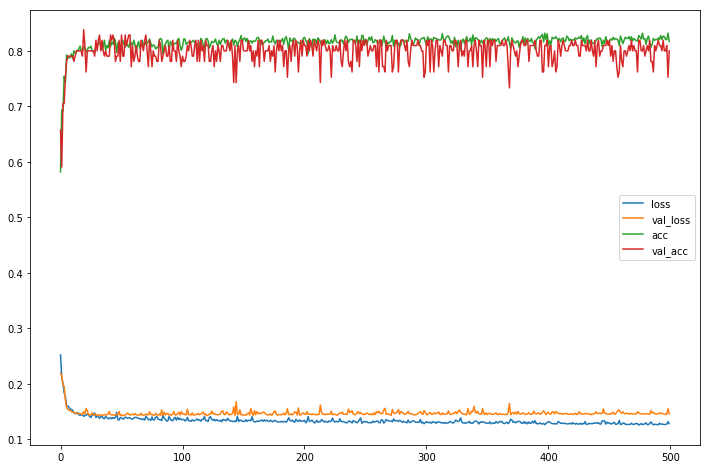

In [13]:
# fit 학습
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])

# 보여주기
plt.show()

In [14]:
# 모델 저장
from keras.models import load_model
model.save('saved_model.h5')
print('학습된 모델을 저장했습니다.')

학습된 모델을 저장했습니다.


In [21]:
dicaprio = np.array([3, 0, 19, 0]).reshape(1,4)
model.predict(dicaprio)

array([[0.15848742]], dtype=float32)

In [20]:
pclass = input()
sex = input()
age = input()
fellow = input()

data = np.array([pclass, sex, age, fellow]).reshape(1,4)
arr = model.predict(data)
survive = arr[0]
print(survive*100)

3
0
19
0
[15.8487425]
